# Para ler grib com Xarray precisa instalar CFGRIB: https://pypi.org/project/cfgrib/

In [1]:
import xarray as xr
import time

Lendo um arquivo

In [2]:
%%time
ds = xr.open_dataset('MERGE_CPTEC_20230101.grib2', engine='cfgrib')
ds

CPU times: total: 734 ms
Wall time: 1.78 s


<xarray.Dataset>
Dimensions:     (latitude: 924, longitude: 1001)
Coordinates:
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 -60.05 -59.95 -59.85 ... 32.05 32.15 32.25
  * longitude   (longitude) float64 239.9 240.0 240.1 ... 339.8 339.9 339.9
    valid_time  datetime64[ns] ...
Data variables:
    prec        (latitude, longitude) float32 ...
    prmsl       (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             consensus
    GRIB_centreDescription:  Consensus
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             Consensus
    history:                 2023-10-11T15:49 GRIB to CDM+CF via cfgrib-0.9.1...

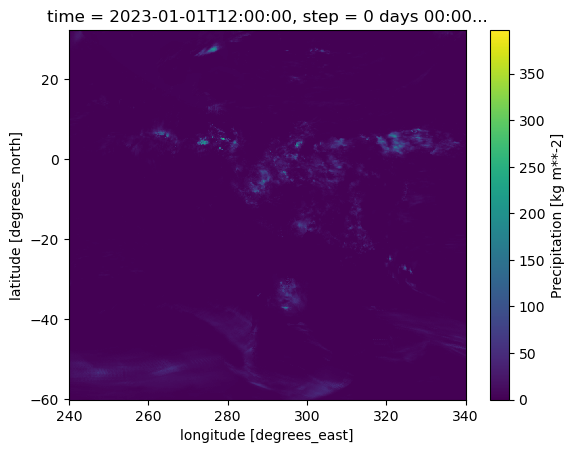

In [3]:
ds['prec'].plot()

Lendo vários arquivos

In [4]:
%%time
ds = xr.open_mfdataset('*.grib2', 
                         engine="cfgrib", 
                         concat_dim = 'step', 
                         combine='nested')
ds

Ignoring index file 'C:\\Users\\enriq\\OneDrive\\Área de Trabalho\\codigos_python\\merge\\MERGE_CPTEC_20230101.grib2.923a8.idx' incompatible with GRIB file


CPU times: total: 40.8 s
Wall time: 41.7 s


<xarray.Dataset>
Dimensions:     (step: 31, latitude: 924, longitude: 1001)
Coordinates:
    time        (step) datetime64[ns] 2023-01-01T12:00:00 ... 2023-01-31T12:0...
  * step        (step) timedelta64[ns] 00:00:00 00:00:00 ... 00:00:00 00:00:00
    surface     float64 0.0
  * latitude    (latitude) float64 -60.05 -59.95 -59.85 ... 32.05 32.15 32.25
  * longitude   (longitude) float64 239.9 240.0 240.1 ... 339.8 339.9 339.9
    valid_time  (step) datetime64[ns] 2023-01-01T12:00:00 ... 2023-01-31T12:0...
Data variables:
    prec        (step, latitude, longitude) float32 dask.array<chunksize=(1, 924, 1001), meta=np.ndarray>
    prmsl       (step, latitude, longitude) float32 dask.array<chunksize=(1, 924, 1001), meta=np.ndarray>
Attributes:
    GRIB_edition:            2
    GRIB_centre:             consensus
    GRIB_centreDescription:  Consensus
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             Consensus
    history:                 2023-10-11T15:50 GRIB to CDM+CF via cfgrib-0.9.1...